# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ramadhan Ihsani Yulfa
- **Email:** ihsani.yulfa@gmail.com
- **ID Dicoding:** ramadhan_iy

Call files from Github

In [2]:
import os

# Tentukan nama folder yang akan diunduh
folder_name = "Proyek-Akhir-Dicoding-Data_Analysis"

# Periksa apakah folder sudah ada
if not os.path.exists(folder_name):
    # Jika folder belum ada, maka jalankan git clone
    !git clone https://github.com/RamadhanIY/Proyek-Akhir-Dicoding-Data_Analysis.git
else:
    print("Folder sudah ada, tidak perlu melakukan git clone.")

Cloning into 'Proyek-Akhir-Dicoding-Data_Analysis'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 27.57 MiB | 8.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat kepuasan pelanggan berdasarkan skor ulasan yang diberikan berdasarkan kategori produk fashion yang dibeli?
- Dari negara manakah yang paling banyak membeli produk fashion?
- Bagaimana tren penjualan produk dalam kategori fashion dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [4]:
#PATH
path_customer = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/customers_dataset.csv"
path_order_payments = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_payments_dataset.csv"
path_order_reviews = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_reviews_dataset.csv"
path_orders_dataset = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/orders_dataset.csv"
path_product_categories = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/product_category_name_translation.csv"
path_products = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/products_dataset.csv"
path_sellers = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/sellers_dataset.csv"
path_order_items = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_items_dataset.csv"

In [5]:
ds_customer = pd.read_csv(path_customer)
ds_order_payments = pd.read_csv(path_order_payments)
ds_order_reviews = pd.read_csv(path_order_reviews)
ds_orders_dataset = pd.read_csv(path_orders_dataset)
ds_product_categories = pd.read_csv(path_product_categories)
ds_products = pd.read_csv(path_products)
ds_sellers = pd.read_csv(path_sellers)
ds_order_items = pd.read_csv(path_order_items)

In [6]:
dataframes = [("ds_customer", ds_customer),
              ("ds_order_payments", ds_order_payments),
              ("ds_order_reviews", ds_order_reviews),
              ("ds_orders_dataset", ds_orders_dataset),
              ("ds_product_categories", ds_product_categories),
              ("ds_products", ds_products),
              ("ds_sellers", ds_sellers),
              ("ds_order_items",ds_order_items)]

for name, df in dataframes:
    print(f"Nama kolom DataFrame {name}: {df.columns.tolist()}")

Nama kolom DataFrame ds_customer: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Nama kolom DataFrame ds_order_payments: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
Nama kolom DataFrame ds_order_reviews: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Nama kolom DataFrame ds_orders_dataset: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Nama kolom DataFrame ds_product_categories: ['product_category_name', 'product_category_name_english']
Nama kolom DataFrame ds_products: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'produ

In [131]:
# Untuk Pertanyaan 1
merged_df_1 = pd.merge(ds_order_items[['order_id', 'product_id']], ds_order_reviews[['order_id', 'review_score']], on='order_id')
merged_df_1 = pd.merge(merged_df_1, ds_products[['product_id', 'product_category_name']], on='product_id')
merged_df_1 = pd.merge(merged_df_1, ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
fashion_data = merged_df_1[merged_df_1['product_category_name_english'].str.startswith("fashio")]

#Untuk Pertanyaan 2
merged_df_2 = pd.merge(ds_order_items[['order_id', 'product_id']], ds_orders_dataset, on='order_id')
merged_df_2 = pd.merge(merged_df_2, ds_products[['product_id', 'product_category_name']], on='product_id')
merged_df_2 = pd.merge(merged_df_2, ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
merged_df_2 = pd.merge(merged_df_2, ds_customer[["customer_id","customer_city","customer_state"]],on = "customer_id")
fashion_data_2 = merged_df_2[merged_df_2['product_category_name_english'].str.startswith("fashio")]

#Untuk Pertanyaan 3
trend_selling_fashion = pd.merge(ds_orders_dataset[["order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at"]],ds_order_items[['order_id', 'product_id']], on = "order_id")
trend_selling_fashion = pd.merge(trend_selling_fashion,ds_products[['product_id', 'product_category_name']], on='product_id')
trend_selling_fashion = pd.merge(trend_selling_fashion,ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
trend_selling_fashion = trend_selling_fashion[trend_selling_fashion['product_category_name_english'].str.startswith("fashio")]


### Assessing Data

In [126]:
def assessing_data(dataset, change_name):

  print("Data yang Missing Values:\n")
  print(dataset.isna().sum())
  print("\nData yang terduplikat: ")
  print(dataset.duplicated().sum())


  if change_name in dataset.values:
    dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)
    print("Penggantian berhasil dilakukan.")
  else:
      print("Tidak ada nilai yang diganti.")


#### Data Pertanyaan 1

Saya mengubah nama kategori yang berbahasa Inggris pada kategori fashion, karena ada salah satu kategori yang penulisannya salah, yaitu fashio_female_clothing


In [132]:
print("Data untuk menjawab Pertanyaan 1 \n")

change_name = "fashio_female_clothing"

assessing_data(fashion_data,change_name)

Data untuk menjawab Pertanyaan 1 

Data yang Missing Values:

order_id                         0
product_id                       0
review_score                     0
product_category_name            0
product_category_name_english    0
dtype: int64

Data yang terduplikat: 
98
Penggantian berhasil dilakukan.


<ipython-input-126-547b0695e5b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)


#### Data Pertanyaan 2


In [133]:
print("Data untuk menjawab Pertanyaan 2 \n")

change_name = "fashio_female_clothing"

assessing_data(fashion_data_2,change_name)

Data untuk menjawab Pertanyaan 2 

Data yang Missing Values:

order_id                          0
product_id                        0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date     35
order_delivered_customer_date    66
order_estimated_delivery_date     0
product_category_name             0
product_category_name_english     0
customer_city                     0
customer_state                    0
dtype: int64

Data yang terduplikat: 
84
Penggantian berhasil dilakukan.


<ipython-input-126-547b0695e5b3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)


#### Data Pertanyaan 3

In [134]:
print("Data untuk menjawab Pertanyaan 3 \n")

change_name = "fashio_female_clothing"

assessing_data(trend_selling_fashion,change_name)

Data untuk menjawab Pertanyaan 3 

Data yang Missing Values:

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

Data yang terduplikat: 
84
Penggantian berhasil dilakukan.


Saya mengubah nama kategori yang berbahasa Inggris pada kategori fashion, karena ada salah satu kategori yang penulisannya salah, yaitu fashio_female_clothing


### Cleaning Data

- Pada data untuk menjawab pertanyaan 1, dan data untuk menjawab pertanyaan 3, saya tidak melakukan Cleaning Data dikarenakan data ini tidak ada yang memiliki *missing values*, dan data duplikatnya masih diwajarkan karena duplikasinya terdapat pada produk yang dibeli.
- Berdasarkan dataset untuk menjawab pertanyaan 2 yang memiliki missing values, saya tidak akan mengisi data tersebut dikarenakan alasan missing valuesnya memang barang belum sampai ke lokasi pembeli. Selain itu, data yang memiliki missing values ini tidak akan digunakan untuk menjawab pertanyaan kedua.
.

In [109]:
#check missing values
missing_values = fashion_data_2[fashion_data_2.isnull().any(axis=1)]
missing_values

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
43775,2a5509f085830eb1ed8de4678769c2ab,5d7c23067ed3fc8c6e699b9373d5890b,6253abaa7f49a14ed55f0b1c0e1e9455,shipped,2017-08-24 12:23:11,2017-08-24 12:30:19,2017-08-24 17:52:18,NaN,2017-09-06 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
43952,6ceb24a53abed9d619d077dc285fffb8,e338f548cda0b52650b9acfd317a74db,e70fcabf5f6bf5273ba341a46b6b83a8,shipped,2017-04-15 13:36:56,2017-04-15 13:45:18,2017-04-18 12:23:29,NaN,2017-05-24 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,vila velha,ES
43981,76464635ac7911e6670c028e667ca7f0,9fe172fa8e662ca8572cf12abf8bce23,a94e78deb3579cab87a6df262fb7620c,shipped,2018-08-08 12:07:33,2018-08-08 12:15:19,2018-08-09 14:22:00,NaN,2018-08-23 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,serra,ES
43991,dc8e7d66422ec37c6fa1cd4f6d29a85a,9fe172fa8e662ca8572cf12abf8bce23,d457b3332a59dfd741d7bd9bb57b73c1,shipped,2018-07-15 14:03:37,2018-07-15 14:15:14,2018-07-16 15:52:00,NaN,2018-08-02 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,salvador,BA
44014,8bc9548dbe844e1bf48ac197c5609045,1d7db62a21ffb4f220d3e8a05fa77e02,d4dc57fd18dfe3e30be4d066d873d388,processing,2018-07-23 18:03:03,2018-07-24 10:32:19,NaN,NaN,2018-08-13 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,fortaleza,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110065,1c54750859f8472306a0b63d74e782ef,771fdcb0db87731f794a0e723e93b732,54b30cf929edf0b2c88698d991241574,processing,2017-02-25 15:37:25,2017-03-02 03:50:30,NaN,NaN,2017-03-23 00:00:00,fashion_roupa_feminina,fashion_female_clothing,sao paulo,SP
110075,39d4b3308183021b1e0b95b195b4589b,c4cca1d23088d10099f52159878b6686,226074d98d9f69790f1d87bb3b1f9cf6,shipped,2017-05-07 12:33:16,2017-05-07 13:10:09,2017-05-10 09:55:59,NaN,2017-05-31 00:00:00,fashion_roupa_feminina,fashion_female_clothing,tres rios,RJ
110094,615e54068238441742c4daf6a7b4ccff,8b100f92b312e18e03f0ee8f0c0011bd,9a66505bf502bb3d549c86dd61b38b02,invoiced,2017-11-13 16:27:09,2017-11-14 04:26:44,NaN,NaN,2017-12-01 00:00:00,fashion_roupa_feminina,fashion_female_clothing,ubatuba,SP
110977,57edfe6486364c7777241f5ab5902715,cc696680ea0cefcd5d7d5d928afb8de8,1a655f9c2a5fd2c3e77940ffdc848989,processing,2017-06-13 10:51:54,2017-06-13 11:03:07,NaN,NaN,2017-07-10 00:00:00,fashion_esporte,fashion_sport,arroio do meio,RS


## Exploratory Data Analysis (EDA)

#### Explore Dataset for Question 1

In [111]:
fashion_data.describe(include="all")

,order_id,product_id,review_score,product_category_name,product_category_name_english
count,2650,2650,2650.000000,2650,2650
unique,2391,1216,NaN,7,7
top,1daecbe2a13ab0881c418e978f1e08c1,d017a2151d543a9885604dc62a3d9dcc,NaN,fashion_bolsas_e_acessorios,fashion_bags_accessories
freq,6,140,NaN,2039,2039
mean,NaN,NaN,4.115849,NaN,NaN
std,NaN,NaN,1.318829,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


In [112]:
fashion_data.reset_index()

,index,order_id,product_id,review_score,product_category_name,product_category_name_english
0,43163,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
1,43164,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
2,43165,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
3,43166,001021efaa8636c29475e7734483457d,5d7c23067ed3fc8c6e699b9373d5890b,4,fashion_bolsas_e_acessorios,fashion_bags_accessories
4,43167,03b9c1e9a4406645c06dde26f4a704e9,5d7c23067ed3fc8c6e699b9373d5890b,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
...,...,...,...,...,...,...
2645,110745,b99217b1fcf2fdeace7b8d869b76cb91,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2646,110746,bc3ac768a8963f4ca68942ea6558fc9f,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2647,110747,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2648,110748,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [113]:
print(fashion_data.nunique())
print("\nJumlah Order berdasarkan Kategori Produk Fashion : \n")
print(fashion_data.product_category_name_english.value_counts())

order_id                         2391
product_id                       1216
review_score                        5
product_category_name               7
product_category_name_english       7
dtype: int64

Jumlah Order berdasarkan Kategori Produk Fashion : 

fashion_bags_accessories     2039
fashion_shoes                 261
fashion_male_clothing         131
fashion_underwear_beach       130
fashion_female_clothing        50
fashion_sport                  31
fashion_childrens_clothes       8
Name: product_category_name_english, dtype: int64


In [114]:
fashion_categories = fashion_data.groupby(by = "product_category_name_english").agg(
  {
   "product_id" : "nunique",
   "order_id" : "count",
   "review_score": ["max","min","mean","std"]
  }
)
fashion_categories

product_id order_id review_score                \
                                 nunique    count          max min      mean   
product_category_name_english                                                  
fashion_bags_accessories             847     2039            5   1  4.144679   
fashion_childrens_clothes              5        8            5   1  4.500000   
fashion_female_clothing               27       50            5   1  3.780000   
fashion_male_clothing                 94      131            5   1  3.641221   
fashion_shoes                        171      261            5   1  4.233716   
fashion_sport                         19       31            5   1  4.258065   
fashion_underwear_beach               53      130            5   1  3.976923   

                                         
                                    std  
product_category_name_english            
fashion_bags_accessories       1.289027  
fashion_childrens_clothes      1.414214  
fashion_female_clothing        1.359622  
fashion_male_clothing          1.700989  
fashion_shoes                  1.259950  
fashion_sport                  1.153769  
fashion_underwear_beach        1.372292

#### EDA Pertanyaan 2

In [119]:
fashion_data_2.describe(include="all")

,level_0,index,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
count,2642.00000,2642.000000,2642,2642,2642,2642,2642,2642,2607,2576,2642,2642,2642,2642,2642
unique,NaN,NaN,2407,1221,2407,5,2400,2397,2278,2343,390,7,7,765,25
top,NaN,NaN,bb82809ea3ca9f3edbe589b60e14e0cb,d017a2151d543a9885604dc62a3d9dcc,d3ecf0664acdf35f6e78389ed3e223f0,delivered,2018-04-28 21:06:05,2017-10-18 12:49:41,2018-05-02 11:55:00,2017-10-19 15:32:12,2017-09-01 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
freq,NaN,NaN,6,140,6,2575,6,6,6,6,19,2031,2031,416,1108
mean,1320.50000,59550.384557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,762.82403,27026.515967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,41985.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,660.25000,44428.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1320.50000,45093.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1980.75000,45756.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
fashion_data_2.reset_index()
fashion_data_2.drop(["index","level_0"],1) #Jika ada index dan level_0 akibat menggunakan reset_index()

<ipython-input-121-ee2c83960f7f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fashion_data_2.drop(["index","level_0"],1)


,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
0,f7ba0ab952e0165fed5ffae1ffff6627,183c95ad186f48c320bbac4643829d3f,ae1a0576d2d6b806f8ac488e766b7b4a,delivered,2018-04-30 11:39:31,2018-04-30 11:55:08,2018-04-30 14:12:00,2018-05-03 17:06:51,2018-05-18 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
1,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,6a899e55865de6549a58d2c6845e5604,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,2018-08-07 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,monte alto,SP
2,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,a9c2657d6325c3a16a14172b79188fb8,delivered,2017-10-18 00:50:36,2017-10-18 01:10:50,2017-10-18 18:33:38,2017-10-19 18:22:01,2017-10-30 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
3,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,a9c2657d6325c3a16a14172b79188fb8,delivered,2017-10-18 00:50:36,2017-10-18 01:10:50,2017-10-18 18:33:38,2017-10-19 18:22:01,2017-10-30 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
4,001021efaa8636c29475e7734483457d,5d7c23067ed3fc8c6e699b9373d5890b,2dfbf74859104caf100df3720a1d833d,delivered,2018-02-27 09:27:14,2018-02-27 09:35:41,2018-02-27 21:43:46,2018-03-08 20:06:33,2018-03-23 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,ivaipora,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,3da4b0f0c89bb8fee8a810459e641414,28ac6af4008a402e5039f3e042a36e13,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-12 15:31:40,2017-06-13 13:23:01,2017-06-23 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP
2638,9fa3a005f89a187501fa1bd63d6125fb,57bdf3098169cccdb62221bd3e089cbd,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP
2639,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,f4b4417d306cbf8c55ea65c89d0261f7,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-03 18:54:12,2017-10-30 12:37:42,2017-11-01 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,macaubas,BA
2640,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,035c08a68b237ef4afc82109e61a7380,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-04 15:15:00,2018-06-05 21:52:02,2018-06-28 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP


In [122]:
print(fashion_data_2.nunique())
print("\nJumlah Order berdasarkan Kategori Produk Fashion : \n",fashion_data.product_category_name_english.value_counts())

level_0                          2642
index                            2642
order_id                         2407
product_id                       1221
customer_id                      2407
order_status                        5
order_purchase_timestamp         2400
order_approved_at                2397
order_delivered_carrier_date     2278
order_delivered_customer_date    2343
order_estimated_delivery_date     390
product_category_name               7
product_category_name_english       7
customer_city                     765
customer_state                     25
dtype: int64

Jumlah Order berdasarkan Kategori Produk Fashion : 
 fashion_bags_accessories     2039
fashion_shoes                 261
fashion_male_clothing         131
fashion_underwear_beach       130
fashion_female_clothing        50
fashion_sport                  31
fashion_childrens_clothes       8
Name: product_category_name_english, dtype: int64


In [123]:
def create_by_customer_state_df(df):
    by_customer_state_df = pd.DataFrame(df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending = False))
    by_customer_state_df.rename(columns={
        "customer_id": "customer_count",
    }, inplace=True)

    states = {
    'SP': 'São Paulo',
    'MG': 'Minas Gerais',
    'RJ': 'Rio de Janeiro',
    'PR': 'Paraná',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'BA': 'Bahia',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'DF': 'Distrito Federal',
    'PE': 'Pernambuco',
    'PA': 'Pará',
    'CE': 'Ceará',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PB': 'Paraíba',
    'RN': 'Rio Grande do Norte',
    'SE': 'Sergipe',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'PI': 'Piauí',
    'AL': 'Alagoas',
    'AC': 'Acre',
    'AM': 'Amazonas'
    }

    by_customer_state_df.reset_index(inplace=True)
    by_customer_state_df['customer_state'] = by_customer_state_df['customer_state'].map(states)

    return by_customer_state_df

create_by_customer_state_df(fashion_data_2)

,customer_state,customer_count
0,São Paulo,1001
1,Minas Gerais,325
2,Rio de Janeiro,239
3,Paraná,142
4,Rio Grande do Sul,99
5,Santa Catarina,94
6,Bahia,93
7,Goiás,61
8,Espírito Santo,55
9,Distrito Federal,52


#### EDA Pertanyaan 3

In [138]:
trend_selling_fashion

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,product_id,product_category_name,product_category_name_english
99048,9defaf92cff22420e4e8ef7784815a55,64fb950e760ec8b0db79154a1fa9c1bf,delivered,2018-05-11 13:10:51,2018-05-11 13:36:50,cf944645d4ff2a3eed3ae17f641ea861,fashion_underwear_e_moda_praia,fashion_underwear_beach
99049,68b12ff83359aac4ddb4bcf1244b3a66,4be7a641296e9a4e87db08248257f4ef,delivered,2017-12-06 19:28:08,2017-12-08 02:34:32,cf944645d4ff2a3eed3ae17f641ea861,fashion_underwear_e_moda_praia,fashion_underwear_beach
99050,83924c36ceb82b354fa3408e645cb699,bd66021ab62baba3336997d620aa4a7d,delivered,2017-12-03 10:59:09,2017-12-03 12:11:56,cf944645d4ff2a3eed3ae17f641ea861,fashion_underwear_e_moda_praia,fashion_underwear_beach
99051,3dddd02cc38fbaa0a544a1e928aee40e,d2157e41ca09bbe3a232a528d658195c,delivered,2018-05-17 16:46:58,2018-05-18 16:58:18,a70d74f54feefedd8108c45553766340,fashion_underwear_e_moda_praia,fashion_underwear_beach
99052,75d064d09b807b1fe4b662a0b7611f8b,f4d9d59405e120b89dbc731ec632ae1f,delivered,2018-07-04 09:33:56,2018-07-05 16:34:36,a70d74f54feefedd8108c45553766340,fashion_underwear_e_moda_praia,fashion_underwear_beach
...,...,...,...,...,...,...,...,...
110954,bc3ac768a8963f4ca68942ea6558fc9f,7968f8e8d5429c6a0611671f5a52ed2b,delivered,2018-03-21 09:40:36,2018-03-22 03:09:01,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110955,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110956,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,57bdf3098169cccdb62221bd3e089cbd,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110957,3da4b0f0c89bb8fee8a810459e641414,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,28ac6af4008a402e5039f3e042a36e13,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [136]:
trend_selling_fashion.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,product_id,product_category_name,product_category_name_english
count,2642,2642,2642,2642,2642,2642,2642,2642
unique,2407,2407,5,2400,2397,1221,7,7
top,bb82809ea3ca9f3edbe589b60e14e0cb,d3ecf0664acdf35f6e78389ed3e223f0,delivered,2017-10-18 12:36:56,2018-05-01 02:10:25,d017a2151d543a9885604dc62a3d9dcc,fashion_bolsas_e_acessorios,fashion_bags_accessories
freq,6,6,2575,6,6,140,2031,2031


In [137]:
print(trend_selling_fashion.nunique())
print("\nJumlah Order berdasarkan Kategori Produk Fashion : \n")
print(trend_selling_fashion.product_category_name_english.value_counts())

order_id                         2407
customer_id                      2407
order_status                        5
order_purchase_timestamp         2400
order_approved_at                2397
product_id                       1221
product_category_name               7
product_category_name_english       7
dtype: int64

Jumlah Order berdasarkan Kategori Produk Fashion : 

fashion_bags_accessories     2031
fashion_shoes                 262
fashion_male_clothing         132
fashion_underwear_beach       131
fashion_female_clothing        48
fashion_sport                  30
fashion_childrens_clothes       8
Name: product_category_name_english, dtype: int64


## Visualization & Explanatory Analysis

## Function untuk melakukan visualisasi

In [63]:
def create_mean_review_items_df(df):
    mean_review_items_df = df.groupby(by = "product_category_name_english").review_score.mean().sort_values(ascending = False)
    return mean_review_items_df



### Pertanyaan 1: Bagaimana tingkat kepuasan pelanggan berdasarkan skor ulasan yang diberikan pada masing-masing kategori produk fashion yang dibeli?

In [69]:
mean_review_items_df = create_mean_review_items_df(fashion_data)

<ipython-input-74-1fedfc7a06af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data = pd.DataFrame(mean_review_items_df), palette=colors)


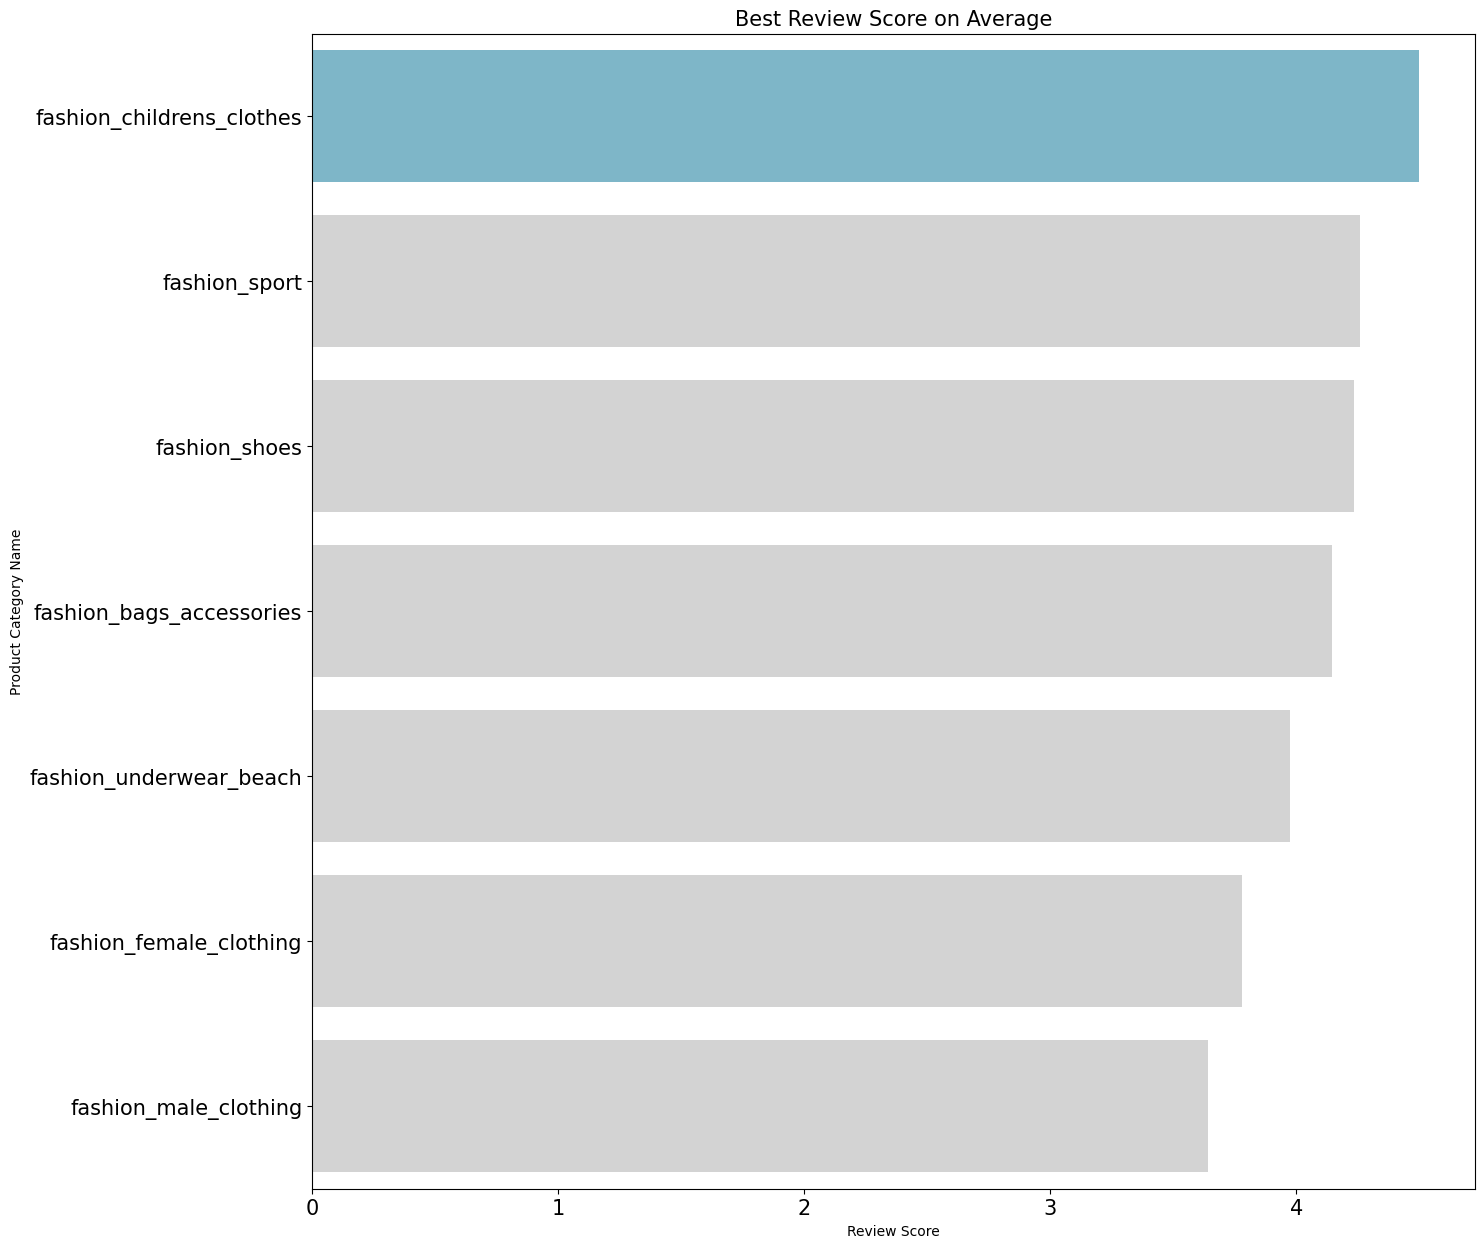

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data = pd.DataFrame(mean_review_items_df), palette=colors)
ax.set_ylabel("Product Category Name")
ax.set_xlabel("Review Score")
ax.set_title("Best Review Score on Average", loc="center", fontsize=15)

ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)

Berdasarkan gambar di atas, bisa disimpulkan bahwa produk fashion pakaian anak memiliki rating yang paling tinggi. Namun, pada produk fashion lainnya juga rata-rata ratingnya cukup baik.

### Pertanyaan 2: Dari negara manakah yang paling banyak membeli produk fashion?

In [93]:
by_customer_state_df = create_by_customer_state_df(fashion_data_2)
by_customer_state_df.head(5)

,customer_state,customer_count
0,São Paulo,1001
1,Minas Gerais,325
2,Rio de Janeiro,239
3,Paraná,142
4,Rio Grande do Sul,99


<ipython-input-94-e801882b5c00>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors)
<ipython-input-94-e801882b5c00>:4: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors)


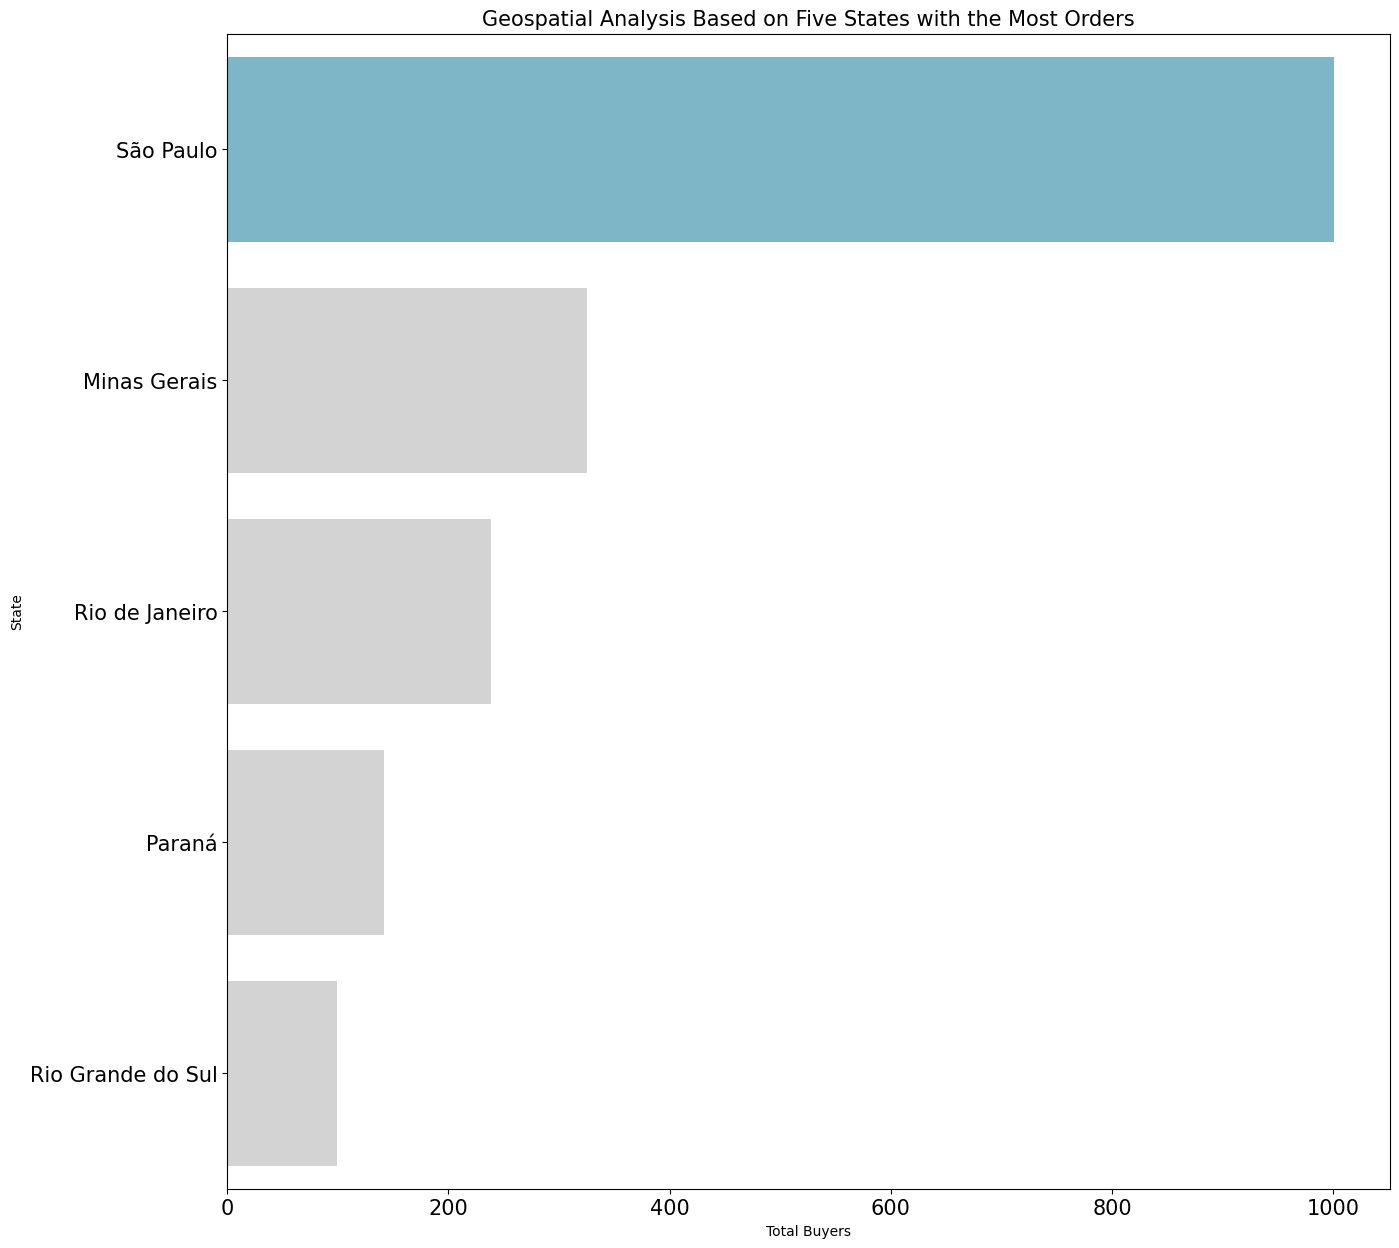

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors)
ax.set_ylabel("State")
ax.set_xlabel("Total Buyers")
ax.set_title("Geospatial Analysis Based on Five States with the Most Orders", loc="center", fontsize=15)

ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2